In [1]:
%matplotlib inline
from pyvista import set_plot_theme
set_plot_theme('document')
import gempy as gp

# Aux imports
import numpy as np
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
import gstools as gs

import pyvista as pv
import pyvistaqt as pvqt
import PVGeo
import glob
import random
from tqdm import tqdm

np.random.seed(1515)
pd.set_option('precision', 2)

No module named 'osgeo'


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\pasha\python\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
#define resolution and mesh size
reso=[50, 50, 50]
mesh_size = reso[0]*reso[1]*reso[2]
extent=[0, 1223, 0, 3000, -780, 0]
print(' mesh size: ' + str(mesh_size))

 mesh size: 125000


In [3]:
surface_points=pd.read_csv('data_all_test100.csv')
orientations=pd.read_csv('data_all_test100.csv')

In [4]:
geo_data = gp.create_data('foresets', extent=extent, resolution=reso)
geo_data.set_surface_points(surface_points)
geo_data.set_orientations(orientations)
geo_data.resolution=reso

Active grids: ['regular']


In [5]:
gp.map_stack_to_surfaces(geo_data, {"Strat_Series1":('topo'),
                                    "Strat_Series2":('darkmatrix_porphyry3'),
                                    "Strat_Series3":('darkmatrix_porphyry2'),
                                    "Strat_Series4":('darkmatrix_porphyry'),
                                    "Strat_Series5":('host rock'),
                                    "Strat_Series6":('pitporphyryintrusion','centralaplite','southwestporphyry','questagraniteporphyry')})

geo_data.add_series("Basement")
geo_data.add_surfaces('basement')

,surface,series,order_surfaces,color,id
0,topo,Strat_Series1,1,#015482,1
1,darkmatrix_porphyry3,Strat_Series2,1,#9f0052,2
2,darkmatrix_porphyry2,Strat_Series3,1,#ffbe00,3
3,darkmatrix_porphyry,Strat_Series4,1,#728f02,4
4,host rock,Strat_Series5,1,#443988,5
5,pitporphyryintrusion,Strat_Series6,1,#ff3f20,6
6,centralaplite,Strat_Series6,2,#5DA629,7
7,southwestporphyry,Strat_Series6,3,#4878d0,8
8,questagraniteporphyry,Strat_Series6,4,#ee854a,9
9,basement,Basement,1,#6acc64,10


In [6]:
geo_data.get_data()

X       Y      Z    smooth                surface  \
surface_points 0     843.87   930.0  -70.2  2.00e-06                   topo   
               1     501.43   990.0  -54.6  2.00e-06                   topo   
               2     354.67  2490.0  -23.4  2.00e-06                   topo   
               3    1186.31   390.0  -39.0  2.00e-06                   topo   
               4    1088.47   870.0  -54.6  2.00e-06                   topo   
...                     ...     ...    ...       ...                    ...   
orientations   464   672.65  1470.0 -772.2  1.00e-02  questagraniteporphyry   
               465   256.83  2550.0 -756.6  1.00e-02  questagraniteporphyry   
               466   892.79  1590.0 -772.2  1.00e-02  questagraniteporphyry   
               467   183.45  1590.0 -709.8  1.00e-02  questagraniteporphyry   
               468   672.65  2250.0 -772.2  1.00e-02  questagraniteporphyry   

                     G_x   G_y   G_z  
surface_points 0     NaN   NaN   NaN  
               1     NaN   NaN   NaN  
               2     NaN   NaN   NaN  
               3     NaN   NaN   NaN  
               4     NaN   NaN   NaN  
...                  ...   ...   ...  
orientations   464 -0.40 -0.16  0.90  
               465  0.12 -0.02  0.99  
               466  0.39 -0.35  0.85  
               467  0.39 -0.06  0.92  
               468  0.12  0.28  0.95  

[938 rows x 8 columns]

In [7]:
geo_data.series

,order_series,BottomRelation,isActive,isFault,isFinite
Strat_Series1,1,Erosion,True,False,False
Strat_Series2,2,Erosion,True,False,False
Strat_Series3,3,Erosion,True,False,False
Strat_Series4,4,Erosion,True,False,False
Strat_Series5,5,Erosion,True,False,False
Strat_Series6,6,Erosion,True,False,False
Basement,7,Erosion,False,False,False


C:\Users\pasha\python\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


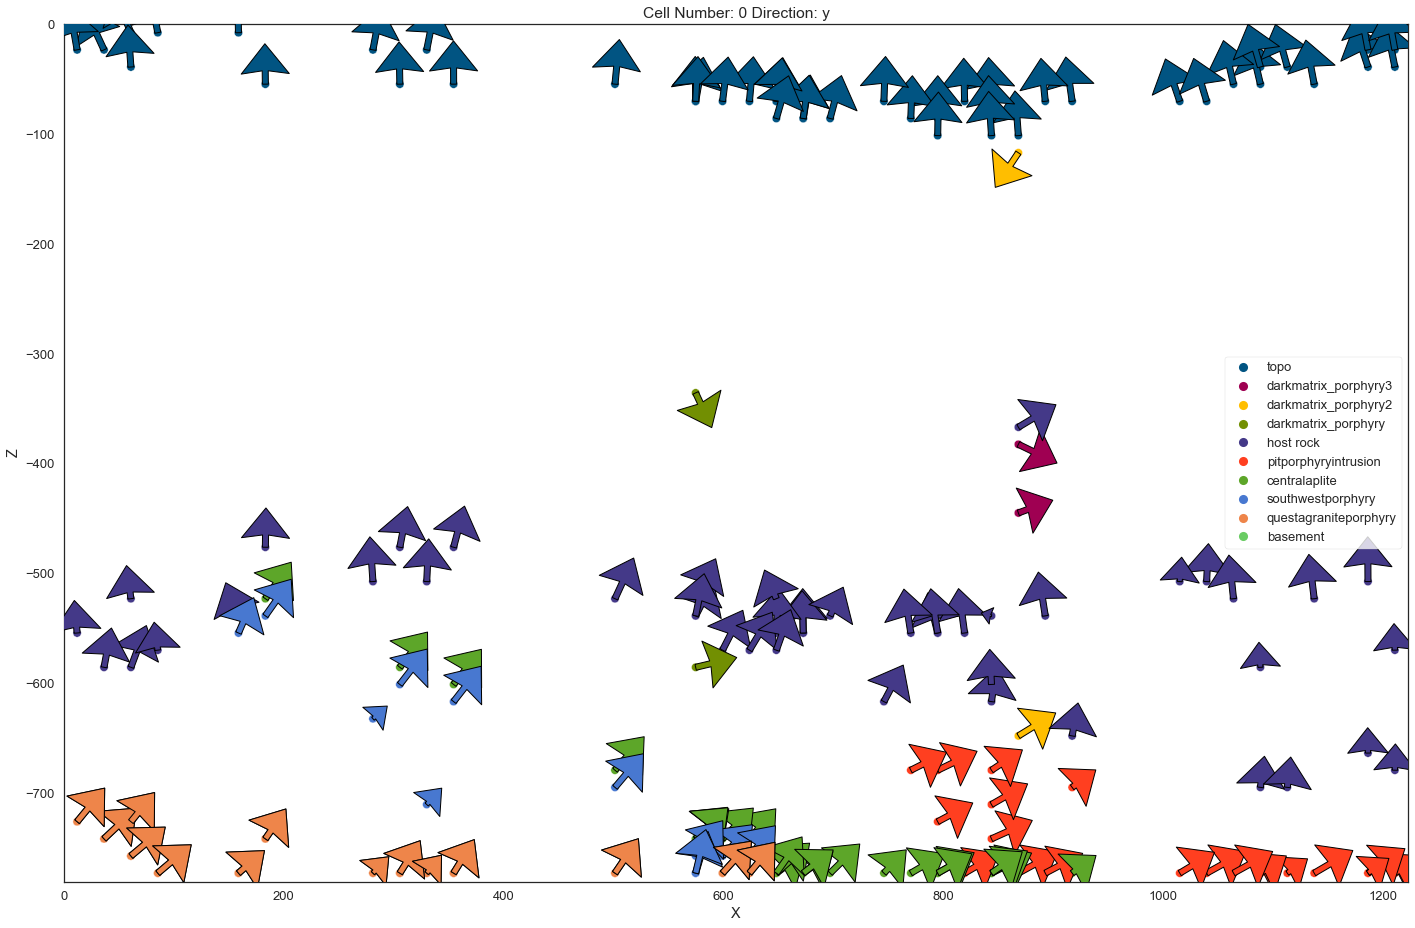

In [8]:
gp.plot_2d(geo_data, cell_number=0, show_data=True, figsize=(20,20))

In [9]:
geo_data.set_topography()

[-156.    0.]
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[  12.23      ,   30.        , -772.2       ],
       [  12.23      ,   30.        , -756.6       ],
       [  12.23      ,   30.        , -741.        ],
       ...,
       [1223.        , 2877.55102041, -127.33908934],
       [1223.        , 2938.7755102 , -124.7007243 ],
       [1223.        , 3000.        , -124.38206172]])

In [10]:
interp_data = gp.set_interpolator(geo_data, compile_theano=True,theano_optimizer='fast_compile')

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                                 values
range                          3332.29
$C_o$                        264384.02
drift equations  [3, 3, 3, 3, 3, 3, 3]


In [11]:
%%time
sol = gp.compute_model(geo_data, compute_mesh=True, debug=False)

Wall time: 1min 4s


C:\Users\pasha\python\lib\site-packages\gempy\core\solution.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.geological_map = np.array(


C:\Users\pasha\python\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


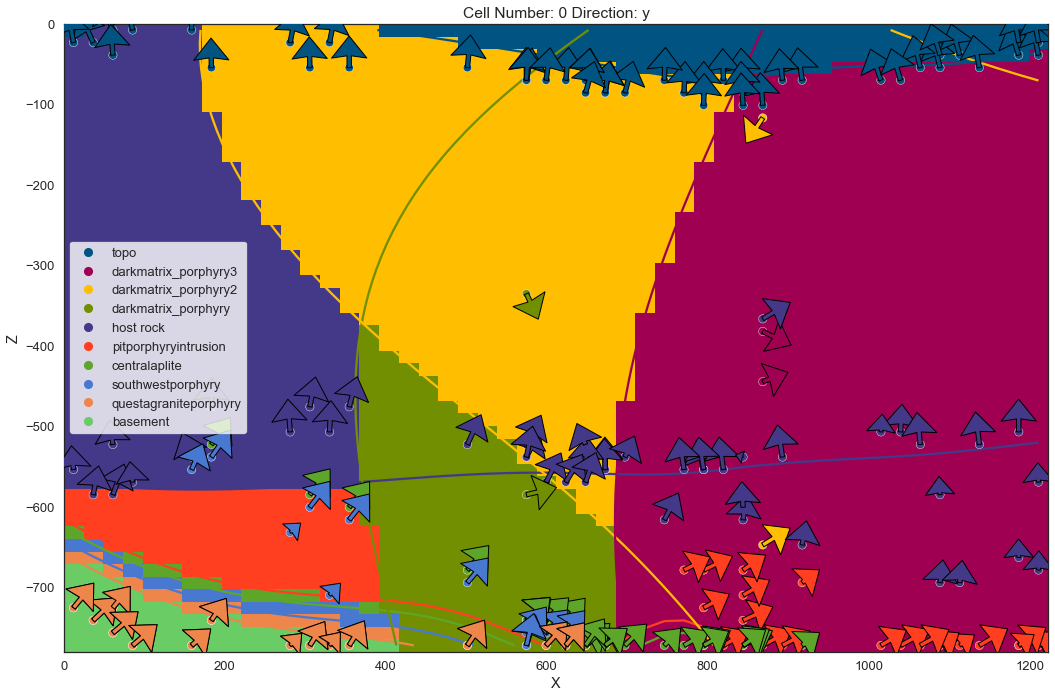

In [12]:
gp.plot_2d(geo_data, cell_number=0, show_data=True, figsize=(15,15))

In [13]:
p3d = gp.plot_3d(geo_data, plotter_type='background', show_lith=True, show_surfaces=True,  show_data=False, image=False,
                 show_topography=True,
                 kwargs_plot_structured_grid={'opacity': .8})

gp.save_model(geo_data)

C:\Users\pasha\python\lib\site-packages\pyvista\plotting\plotting.py:1354: PyvistaDeprecationWarning: 
"stitle" is a depreciated keyword and will be removed in a future
release.

Use ``scalar_bar_args`` instead.  For example:

scalar_bar_args={'title': 'Scalar Bar Title'}

  warnings.warn(USE_SCALAR_BAR_ARGS, PyvistaDeprecationWarning)


True

In [13]:
### User-defined functions
def extract_domain(sol, unit):
    '''
    Extract domain coordinates from gempy model by unit name
    arguments:
        sol: Gempy solution object.
        unit: gempy unit by index
    returns:
        dom_x, dom_y, dom_z: coordinates of domain
    '''

    # new version with rounding, definitely necessary
    rounded_lithblock = sol.lith_block.round(0)
    rounded_lithblock = rounded_lithblock.astype(int)

    # mask by array of input surfaces (by id, can be from different series)
    mask = np.isin(rounded_lithblock, unit)

    # get coordinates by mask, mesh_size is defined on in[55]
    #krig_lith = sol.lith_block[mask]
    dom_grid = sol.grid.values[:mesh_size][mask]

    dom_x = dom_grid[:,0]
    dom_y = dom_grid[:,1]
    dom_z = dom_grid[:,2]

    return dom_x, dom_y, dom_z

In [14]:
unit_count=int(np.max(sol.lith_block.round(0)))
unit_count

10

### Geostatistics and Kriging

In [15]:
df =pd.read_csv('3_kriging_100.csv')
df

,Unnamed: 0,X,Y,Z,grade,borehole
0,0,1186.31,1110.0,-772.2,0.15,1.0
1,15,1186.31,1110.0,-538.2,0.15,1.0
2,30,1186.31,1110.0,-304.2,0.14,1.0
3,45,501.43,1230.0,-709.8,0.15,2.0
4,60,501.43,1230.0,-475.8,0.16,2.0
...,...,...,...,...,...,...
287,4305,623.73,2790.0,-475.8,0.14,99.0
288,4320,623.73,2790.0,-241.8,0.10,99.0
289,4335,158.99,150.0,-694.2,0.15,100.0
290,4350,158.99,150.0,-460.2,0.14,100.0


In [16]:
# create some random input data data (conditioning data)
n=len(df.iloc[:,2])
x = df.iloc[:n,1]
y = df.iloc[:n,2]
z = df.iloc[:n,3]
cond_pos = np.array([x,y,z])
cond_val = df.iloc[:n,4]

In [17]:
# This is to extract smaller domains from gempy by 

domain_x, domain_y, domain_z = extract_domain(sol, (2,3,4,5,6,7,8,9))

In [18]:
# grid coordinate preparation
coordinates = np.array([domain_x, domain_y, domain_z])
coordinates = coordinates.swapaxes(0,1)
    
# This is where the magic happens - GStools offers a lot of options, here a simple version with isotropic range
model = gs.Exponential(dim=3, var=np.var(cond_val), len_scale=200)
krige = gs.krige.Ordinary(model, cond_pos, cond_val)
cond_srf = gs.CondSRF(krige)

# perform kriging
krige((coordinates[:,0],coordinates[:,1], coordinates[:,2]), mesh_type='unstructured')
# alternatively fior SGS
#cond_srf((coordinates[:,0],coordinates[:,1], coordinates[:,2]), mesh_type='unstructured')

# just convenience rename
field = krige
# alternatively for SGS
# field = cond_srf

In [19]:
# convert to pyvista mesh
pc = field.to_pyvista()

In [20]:
# 3D plotting example
spacing = lambda arr: np.unique(np.diff(np.unique(arr)))
voxelsize = spacing(pc.points[:,0]), spacing(pc.points[:,1]), spacing(pc.points[:,2])

pc = pc.cast_to_unstructured_grid()

grade = PVGeo.filters.VoxelizePoints(dx=voxelsize[0][0], dy=voxelsize[1][0], dz=voxelsize[2][0], estimate=False).apply(pc)

In [21]:
#p.add_mesh(grid, opacity=1, show_edges=False, lighting=False, cmap=cmap)
p = pvqt.BackgroundPlotter()
gpv = gp.plot_3d(geo_data, plotter_type='background', show_data=False, show_lith=True, show_surfaces=True,
                kwargs_plot_structured_grid={'opacity': 1})

gpv.p.add_mesh(grade, opacity=0.8, show_edges=False, lighting=False, cmap="rainbow")

p.set_scale(zscale=1)

C:\Users\pasha\python\lib\site-packages\pyvista\plotting\plotting.py:1354: PyvistaDeprecationWarning: 
"stitle" is a depreciated keyword and will be removed in a future
release.

Use ``scalar_bar_args`` instead.  For example:

scalar_bar_args={'title': 'Scalar Bar Title'}

  warnings.warn(USE_SCALAR_BAR_ARGS, PyvistaDeprecationWarning)


In [22]:
#Mo ore density is 10.28 g/cm3
#define grade intervals and check the count of voxels corresponding to the same interval
ore_interval1=[]
for index in tqdm(range(0, len(grade.active_scalars))):
    #for Cu Horizon I:
    if 0.2>grade.active_scalars[index]>0.1:
        ore_interval1.append(grade.active_scalars[index])
            
#calculate volume of total voxels corresponding to a certain ore grade interval
voxel_volume=((extent[1]-extent[0])/reso[0])*((extent[3]-extent[2])/reso[1])*((extent[5]-extent[4])/reso[2])

ore_avrg_grade=np.mean(ore_interval1)
volume=len(ore_interval1)*(voxel_volume)
print('Horizon1=',volume)
print("Average ore grade=", ore_avrg_grade)

100%|████████████████████████████████| 110076/110076 [01:08<00:00, 1598.52it/s]

Horizon1= 2196160668.0
Average ore grade= 0.1418362095818854


### Calculate cosine similarity of cell distribution of domains

In [15]:
unit=range(0,unit_count+1)
for index in unit:
    domain_x, domain_y, domain_z = extract_domain(sol, (unit[index+1]))
    coordinates = np.array([domain_x, domain_y, domain_z])
    coordinates = coordinates.swapaxes(0,1)
    data=pd.DataFrame(coordinates, columns=['X','Y','Z'])
    data.loc[:, 'formation'] =(unit[index+1])
    data.to_csv(r'data_extracted/reconstructed/unit_{}.csv'.format(unit[index+1]), mode="w", index=False)

IndexError: range object index out of range

In [16]:
# if you want to join all files in the same folder
path =r'data_extracted/reconstructed/'

filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
reconstructed = pd.concat(dfs, ignore_index=True)
#df.drop(df.columns[[0]], axis=1, inplace=True)
reconstructed

,X,Y,Z,formation
0,12.23,30.0,-7.8,1
1,12.23,90.0,-7.8,1
2,12.23,150.0,-7.8,1
3,12.23,210.0,-7.8,1
4,12.23,270.0,-7.8,1
...,...,...,...,...
124995,1161.85,2130.0,-772.2,9
124996,1161.85,2190.0,-772.2,9
124997,1161.85,2490.0,-772.2,9
124998,1161.85,2550.0,-772.2,9


In [17]:
# if you want to join all files in the same folder
path =r'data_extracted/ideal/'

filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
ideal = pd.concat(dfs, ignore_index=True)
#df.drop(df.columns[[0]], axis=1, inplace=True)
ideal

,X,Y,Z,formation
0,12.23,30.0,-23.4,1.0
1,12.23,30.0,-7.8,1.0
2,12.23,90.0,-23.4,1.0
3,12.23,90.0,-7.8,1.0
4,12.23,150.0,-23.4,1.0
...,...,...,...,...
124995,1088.47,2250.0,-772.2,9.0
124996,1088.47,2310.0,-772.2,9.0
124997,1088.47,2370.0,-772.2,9.0
124998,1088.47,2430.0,-772.2,9.0


### Compare the data frames with with identical cells

In [18]:
a=ideal.merge(reconstructed, left_on=('X','Y','Z','formation'), right_on=('X','Y','Z','formation'), how='inner')
similarity=(len(a)/len(ideal))*100
similarity

64.6176